<a href="https://colab.research.google.com/github/marciliojrr/IA/blob/main/Prova_IA_Quest%C3%A3o_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 4
---
*Em um Jupyter Notebook (link do colab ou arquivo), utilize o método K vizinhos mais próximos no problema supervisionado escolhido na Questão 2 ou 3 e:*

*a) Aplique e explique os processos de pré-processamento necessários para execução do método K-NN.*

*b) Escolha 5 valores de K e mostre os resultados (escolha uma métrica)?*

*c) Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas) para definir o(s) vizinho(s) mais próximos.*

### *Importando bibliotecas*
---

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### *Importando o conjunto de dados*
---

In [435]:
df = pd.read_csv('Breast_Cancer_Prediction.csv', low_memory=False)

*Observando a aparência do dataset.*

In [436]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


*Removendo colunas que não serão usadas como parâmetro, excluindo possiveis linhas com valores nulos e observando a nova aparência do dataset.*

In [437]:
df.dropna()
df = df.drop(['Sample code number'], axis=1)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### *Pré-processamento*
---
*A variável X contém as colunas de 1 à 9  do conjunto de dados (ou seja, atributos), enquanto y contém a coluna 10 com os rótulos.
Lembrando que:* 

*Class: (2 para benigno, 4 para maligno)*

In [438]:
X = df.iloc[:, :-1].values
y = df.iloc[:,9].values

### *Divisão Treino e Teste*
---
*A divisão será da forma: 80% dos dados para treino e 20% para dados de teste.*

In [439]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### *Normalizando os valores para melhorar a avaliação*
---

In [440]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### *Treinamento e previsões*
---

In [441]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

### *Realizando a previsão*
---
*Class: (2 para benigno, 4 para maligno)*

In [442]:
y_pred = classifier.predict(X_test)
print('Predição\n', y_pred)
print('Teste\n', y_test)

Predição
 [2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 4 4 4 4 2 2
 4 2 2 4 2 4 2 2 2 2 2 2 4 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 2 2 4 4 2 2 2 2 2 4 4 2 4
 2 4 2 2 4 2 2 4 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 4 2]
Teste
 [2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 4 4 4 4 2 2
 4 2 2 4 2 4 2 2 2 4 2 2 4 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 2 2 4 4 2 2 2 2 2 4 2 2 4
 2 4 2 4 4 2 2 4 2 2 2 2 2 4 2 2 2 2 4 2 4 2 2 4 4 2]


### *Avaliando o algoritmo*
---
*   **Acurácia (accuracy)**: Diz quanto o modelo acertou das previsões possíveis.
  
  * *Acurácia = Predições corretas / Todas as predições*

*   **Recall**: Qual proporção de positivos foi identificados corretamente?

 * *Recall = Verdadeiros positivos / Verdadeiros Positivos + Falsos Negativos*


*   **Precisão (precision)**: Qual a proporção de identificações positivas foi realmente correta?

    * *Precisão = Verdadeiros positivos / Verdadeiros Positivos + Falsos Positivos*

* **F-Score**: Mostra o balanço entre a precisão e o recall de nosso modelo.
    * *F-score = 2 * [(precisão * recall) / (precisão + recall)]*

In [443]:
from sklearn.metrics import classification_report, confusion_matrix
print('Matriz de Confusão:\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Matriz de Confusão:
 [[94  1]
 [ 3 39]]
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.97      0.93      0.95        42

    accuracy                           0.97       137
   macro avg       0.97      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137



### *Comparando a taxa de erro com valor de K*
---


Text(0, 0.5, 'Erro médio')

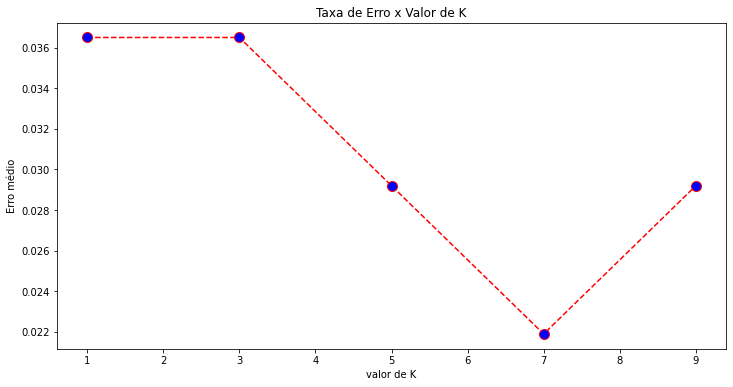

In [444]:
# Calculando erro médio dos valores previstos do conjunto de teste
error = []

for i in range(1, 10, 2):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

# Plotando o gráfico dos valores em *error* em relação aos valores de K
plt.figure(figsize=(12,6))
plt.plot(range(1, 10, 2), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Taxa de Erro x Valor de K')
plt.xlabel('valor de K')
plt.ylabel('Erro médio')